In [51]:
import shutil
import glob
import csv
import ast
import os
import re

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
import matplotlib as mpl

from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem

from mendeleev import element

from rdkit import Chem
import seaborn as sns
import pandas as pd
import numpy as np

from astroquery.linelists.cdms import CDMS
from astroquery.jplspec import JPLSpec
import astropy.units as u
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from tabulate install tabulate

SyntaxError: invalid syntax (4243034991.py, line 29)

In [52]:
import shutil
import glob
import csv
import ast
import os
import re

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
import matplotlib as mpl

from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem

from mendeleev import element

from rdkit import Chem
import seaborn as sns
import pandas as pd
import numpy as np

from astroquery.linelists.cdms import CDMS
from astroquery.jplspec import JPLSpec
import astropy.units as u
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from tabulate import tabulate

In [ ]:
# set rc params for matplotlib
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
mpl.rcParams['mathtext.fontset'] = 'stix'

mpl.rcParams['figure.figsize'] = [5,5]

mpl.rcParams['axes.linewidth'] = 1

mpl.rcParams['lines.markersize'] = 5

mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.framealpha'] = 1.0
mpl.rcParams['legend.edgecolor'] = 'k'
mpl.rcParams['legend.markerscale'] = 1.0

# -- Ticks and tick labels --
mpl.rcParams['axes.edgecolor'] = 'k'
mpl.rcParams['xtick.color'] = 'k'
mpl.rcParams['ytick.color'] = 'k'
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 500
mpl.rcParams['savefig.transparent'] = True

# Plot Conformers for C3HNO2

In [59]:
## load computed pgopher linelist 
comp_loc = '/Users/z5380625/Desktop/'
comp_data_2 = pd.read_csv(comp_loc+"C3HNO3_CONF2.dat", header=None, delimiter=r"	 ")
freqs_2 = comp_data_2.iloc[:,0].values/1000
intens_2 = comp_data_2.iloc[:,1].values*0.65

comp_data_1 = pd.read_csv(comp_loc+"C3HNO3_CONF1.dat", header=None, delimiter=r"	 ")
freqs_1 = comp_data_1.iloc[:,0].values/1000
intens_1 = comp_data_1.iloc[:,1].values*0.35

intens_tot = intens_1 + intens_2

/var/folders/gd/w_6sx_r160zb391203k006_h0000gq/T/ipykernel_8329/2474648630.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  comp_data_2 = pd.read_csv(comp_loc+"C3HNO3_CONF2.dat", header=None, delimiter=r"	 ")
/var/folders/gd/w_6sx_r160zb391203k006_h0000gq/T/ipykernel_8329/2474648630.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  comp_data_1 = pd.read_csv(comp_loc+"C3HNO3_CONF1.dat", header=None, delimiter=r"	 ")


In [63]:
print(freqs_1)
print(freqs_2)

[ -5.45419143  -5.38684824  -5.31950504 ... 129.03016027 129.09750346
 129.16484665]
[-20.2611236  -20.18179037 -20.10245714 ... 138.16733109 138.24666431
 138.32599754]


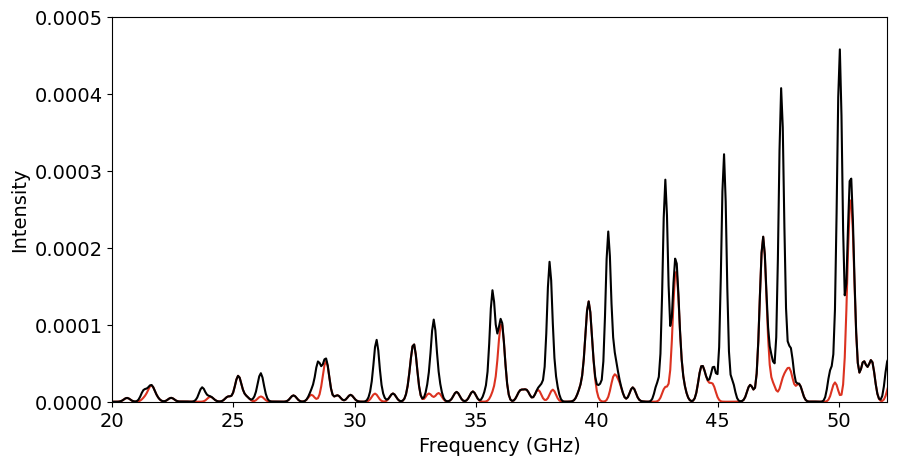

In [72]:
fig, ax = plt.subplots(figsize=(10,5))

#ax.plot(freqs_1,intens_2,color='#005AB5')
ax.plot(freqs_1,intens_1,color='#DC3220')
ax.plot(freqs_1,intens_tot,color='k')
ax.set_xlim(20,52)
ax.set_ylim(0,0.0005)

ax.set_xlabel('Frequency (GHz)', fontsize=14)
ax.set_ylabel('Intensity',fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

plt.savefig('/Users/z5380625/Desktop/C3HNO2_ConformerSpectra_Total.pdf',bbox_inches='tight')
plt.show()

# Compare Rotational Constants

In [8]:
data_compare = pd.read_csv('/Users/z5380625/Documents/Research/4_BigData/rot_const_compare_obs.csv')
data_all = pd.read_csv('/Users/z5380625/Documents/Research/4_BigData/B971_def2TZVPD_DataFile1_GroundState.csv')
data_bio = pd.read_csv('/Users/z5380625/Documents/Research/4_BigData/biosig_CHNOPS.csv')

In [259]:
data_bio.columns

Index(['Unnamed: 0', 'Formula', 'Formula_ID', 'Tot_atoms', 'Tot_nH_atoms',
       'Tot_H_atoms', 'SMILES', 'Dataset_no', 'Molecular_weight',
       'IUPAC_chemname', 'Metalloid', 'EPISUITE', 'InChI_Code', 'InChI_Key',
       'Boiling_Point', 'BP_basis', 'EPIsuite_output', 'MP', 'Basis', 'Life',
       'CHNOPS'],
      dtype='object')

In [35]:
formula_id_list = data_compare['Formula_ID'].values
diffs_A = []
diffs_B = []
diffs_C = []
SMILES = []
num_atoms_list = []
mol_weight_list = []
tot_nHtoms_list = []
for formula in formula_id_list:
    
    A_obs = float(data_compare.loc[(data_compare['Formula_ID']==formula)]['obs_A'].values[0])*0.0000334
    B_obs = float(data_compare.loc[(data_compare['Formula_ID']==formula)]['obs_B'].values[0])*0.0000334
    C_obs = float(data_compare.loc[(data_compare['Formula_ID']==formula)]['obs_C'].values[0])*0.0000334
    
    A_comp = float(data_all.loc[(data_all['Formula']==formula)]['A [cm-1]'].values[0])#*29979.2458
    B_comp = float(data_all.loc[(data_all['Formula']==formula)]['B [cm-1]'].values[0])#*29979.2458
    C_comp = float(data_all.loc[(data_all['Formula']==formula)]['C [cm-1]'].values[0])#*29979.2458

    SMILE = data_all.loc[(data_all['Formula']==formula)]['SMILES'].values[0]
    SMILES.append(SMILE)
    num_atoms = data_all.loc[(data_all['Formula']==formula)]['# Atoms'].values[0]
    num_atoms_list.append(num_atoms)
    weight = data_bio.loc[(data_bio['Formula_ID']==formula)]['Molecular_weight'].values[0]
    mol_weight_list.append(weight)
    nH_atoms = data_bio.loc[(data_bio['Formula_ID']==formula)]['Tot_nH_atoms'].values[0]
    tot_nHtoms_list.append(nH_atoms)


    print(nH_atoms)
    diffs_A.append(np.abs(float(A_obs-A_comp)/A_obs)*100)
    diffs_B.append(np.abs(float(B_obs-B_comp)/B_obs)*100)
    diffs_C.append(np.abs(float(C_obs-C_comp)/C_obs)*100)
print(len(diffs_A))

KeyError: 'Formula_ID'

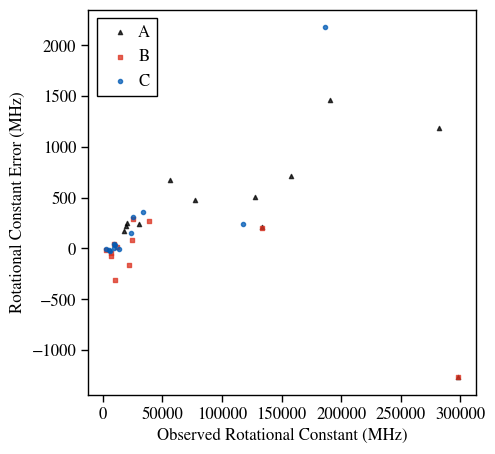

In [95]:
freqs_A = data_compare['obs_A'].values
freqs_B = data_compare['obs_B'].values
freqs_C = data_compare['obs_C'].values

fig, ax = plt.subplots(1,1)

ax.scatter(freqs_A, diffs_A, color='k',marker='^',label='A',alpha=0.75)
ax.scatter(freqs_B, diffs_B, color='#DC3220',marker='s',label='B',alpha=0.75)
ax.scatter(freqs_C, diffs_C, color='#005AB5',marker='o',label='C',alpha=0.75)

ax.set_xlabel('Observed Rotational Constant (MHz)')
ax.set_ylabel('Rotational Constant Error (MHz)')
ax.legend(loc='upper left',handletextpad=0.1)

# plt.savefig('/Users/z5380625/Documents/Research/2_BigData/Plots/ABC_Error_Compare_2to12Atoms.pdf',bbox_inches='tight')
plt.show()

In [14]:
for i in range(0,len(formula_id_list),1):
    print(formula_id_list[i],diffs_A[i],diffs_B[i],diffs_C[i])

CH2O 1344.351713799988 58.46156580000388 193.64878640000097
C4H3N_5 -15.076442999998108 -16.985626500003036 -9.168625600000723
CH4O 143.57759280000755 212.99466609999945 280.7119640000019
H3N 1399.7995935000363 1385.6293428000063 -770.6940808999934
CH2O2 -64.51630500001193 39.65821039999719 44.824903099999574
C2H3N_2 328.05999390000943 -10.747934900002292 -10.76005289999921
C2H4O_1 442.29955170000176 -317.8147668999991 0.13596309999775258
C3H6O_1 265.9432256 -19.035546600001908 2.5197253999995155
H3NO 1559.849228099978 645.3689047000007 635.8069032000021
H3P 926.5606823999842 920.3284419999982 -823.7412592000037
C3H4_1 109.35874989999866 36.353921300000366 52.70936830000028
C2H4O2_4 269.81165970000075 -45.939339200001996 -2.669714199999362


A r-squared:  0.7119335086076308
B r-squared:  0.8290933332623738
C r-squared:  0.7765682243782301
tot r-squared:  0.674232876661219


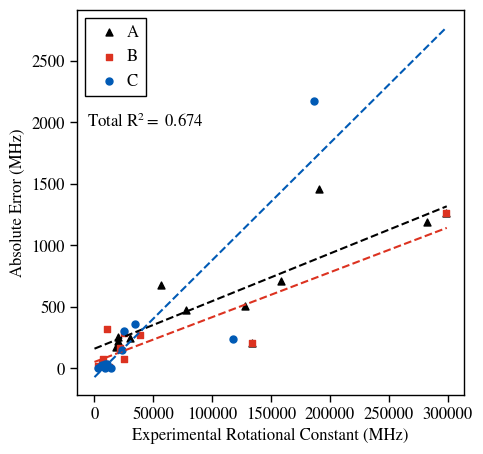

In [100]:
## Abs error ##
fig, ax = plt.subplots(1,1)
freqs = np.arange(0,300000,1000)

A_model = LinearRegression().fit(np.array(freqs_A).reshape(-1,1), np.array(np.abs(diffs_A)))
A_rsq = A_model.score(np.array(freqs_A).reshape(-1,1), np.array(np.abs(diffs_A)))
ax.scatter(freqs_A, np.abs(diffs_A), color='k',marker='^',label = 'A')
print('A r-squared: ',A_rsq)


B_model = LinearRegression().fit(np.array(freqs_B).reshape(-1,1), np.array(np.abs(diffs_B)))
B_rsq = B_model.score(np.array(freqs_B).reshape(-1,1), np.array(np.abs(diffs_B)))
ax.scatter(freqs_B, np.abs(diffs_B), color='#DC3220',marker='s', label = 'B')
print('B r-squared: ',B_rsq)

C_model = LinearRegression().fit(np.array(freqs_C).reshape(-1,1), np.array(np.abs(diffs_C)))
C_rsq = C_model.score(np.array(freqs_C).reshape(-1,1), np.array(np.abs(diffs_C)))
ax.scatter(freqs_C, np.abs(diffs_C), color='#005AB5',marker='o', label = 'C')
print('C r-squared: ',C_rsq)


#plot lines of best fit
ax.plot(freqs,A_model.coef_*freqs+A_model.intercept_,color='k',linestyle='dashed')
ax.plot(freqs,B_model.coef_*freqs+B_model.intercept_,color='#DC3220',linestyle='dashed')
ax.plot(freqs,C_model.coef_*freqs+C_model.intercept_,color='#005AB5',linestyle='dashed')

freqs_tot = np.concatenate((freqs_A,freqs_B,freqs_C),axis=None)
diffs_tot = np.concatenate((diffs_A,diffs_B,diffs_C),axis=None)
tot_model = LinearRegression().fit(np.array(freqs_tot).reshape(-1,1), np.array(np.abs(diffs_tot)))
tot_rsq = tot_model.score(np.array(freqs_tot).reshape(-1,1), np.array(np.abs(diffs_tot)))
print('tot r-squared: ',tot_rsq)

ax.text(0.025,0.70,r'Total R$^2 =$ {:.3f}'.format(tot_rsq),horizontalalignment='left',transform = ax.transAxes)


ax.set_xlabel('Experimental Rotational Constant (MHz)')
ax.set_ylabel('Absolute Error (MHz)')

# Line2D([0], [0], marker='^', color='w', label=r'A', R$^2$ $=$ {:.2f}'.format(A_rsq)#, R$^2$ $=$ {:.2f}'.format(A_rsq)

ax.legend(handletextpad=0.1) 

# plt.savefig('/Users/z5380625/Documents/Research/2_BigData/Plots/ABC_AbsError_Compare_2to12Atoms.pdf',bbox_inches='tight')
plt.show()

In [228]:
print('A RMSD: ', np.sqrt(np.sum(np.array(diffs_A)**2)/len(diffs_A)))
print('B RMSD: ', np.sqrt(np.sum(np.array(diffs_B)**2)/len(diffs_B)))
print('C RMSD: ', np.sqrt(np.sum(np.array(diffs_C)**2)/len(diffs_C)))



A RMSD:  0.034115400881173374
B RMSD:  0.028625752158725957
C RMSD:  0.019111892542173475
Total RMSD:  620.0774311059333


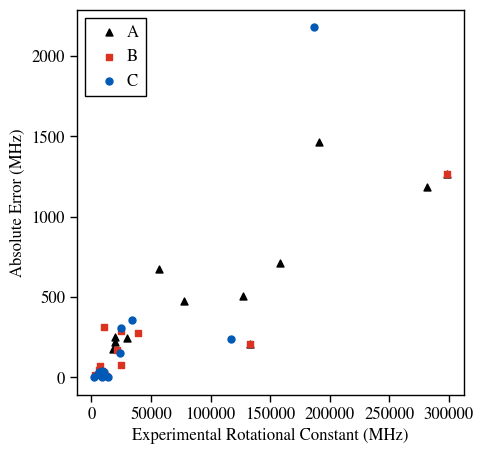

In [103]:
## Abs error ##
fig, ax = plt.subplots(1,1)
freqs = np.arange(0,300000,1000)

ax.scatter(freqs_A, np.abs(diffs_A), color='k',marker='^',label = 'A')


ax.scatter(freqs_B, np.abs(diffs_B), color='#DC3220',marker='s', label = 'B')


ax.scatter(freqs_C, np.abs(diffs_C), color='#005AB5',marker='o', label = 'C')





# ax.text(0.025,0.70,r'Total R$^2 =$ {:.3f}'.format(tot_rsq),horizontalalignment='left',transform = ax.transAxes)


ax.set_xlabel('Experimental Rotational Constant (MHz)')
ax.set_ylabel('Absolute Error (MHz)')

# Line2D([0], [0], marker='^', color='w', label=r'A', R$^2$ $=$ {:.2f}'.format(A_rsq)#, R$^2$ $=$ {:.2f}'.format(A_rsq)

ax.legend(loc = 'upper left', handletextpad=0.1) 

# plt.savefig('/Users/z5380625/Documents/Research/2_BigData/Plots/ABC_AbsError_Compare_2to12Atoms.pdf',bbox_inches='tight')
plt.show()

# Make Latex table

In [252]:
data_compare = pd.read_csv('/Users/mpettyjo/Documents/Research/4_BigData/rot_const_compare_obs.csv')
data_all = pd.read_csv('/Users/mpettyjo/Documents/Research/4_BigData/B971_def2TZVPD_DataFile1_GroundState.csv')
data_bio = pd.read_csv('/Users/mpettyjo/Documents/Research/4_BigData/biosig_CHNOPS.csv')

In [253]:
data_bio

,Unnamed: 0,Formula,Formula_ID,Tot_atoms,Tot_nH_atoms,Tot_H_atoms,SMILES,Dataset_no,Molecular_weight,IUPAC_chemname,...,EPISUITE,InChI_Code,InChI_Key,Boiling_Point,BP_basis,EPIsuite_output,MP,Basis,Life,CHNOPS
0,0,H2,H2,2,0,2,[H][H],1,2.016,dihydrogen,...,[H][H],InChI=1S/H2/h1H,InChIKey=UFHFLCQGNIYNRP-UHFFFAOYSA-N,-250.32,Ex,439.86(BP est) 146.26(MP est) ----(...,146.26,Pred,Y,Y
1,1,CH4,CH4,5,1,4,C,2,16.043,methane,...,C,InChI=1S/CH4/h1H4,InChIKey=VNWKTOKETHGBQD-UHFFFAOYSA-N,-161.7816667,Ex,-62.40(BP est) -152.93(MP est) -161.50(...,-182.4,Expt,Y,Y
2,2,H3N,H3N,4,1,3,N,3,17.031,ammonia,...,N,InChI=1S/H3N/h1H3,InChIKey=QGZKDVFQNNGYKY-UHFFFAOYSA-N,-33.57,Ex,602.75(BP est) 260.60(MP est) ----(...,260.6,Pred,Y,Y
3,3,H2O,H2O,3,1,2,O,4,18.015,water,...,O,InChI=1S/H2O/h1H2,InChIKey=XLYOFNOQVPJJNP-UHFFFAOYSA-N,100.483627,Ex,439.86(BP est) 146.26(MP est) ----(...,146.26,Pred,Y,Y
4,4,C2H2,C2H2,4,2,2,C#C,6,26.038,ethyne,...,C#C,InChI=1S/C2H2/c1-2/h1-2H,InChIKey=HSFWRNGVRCDJHI-UHFFFAOYSA-N,-84.415,Ex,-36.63(BP est) -154.04(MP est) -84.70(...,-80.7,Expt,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16416,16416,C4H8S2,C4H8S2_12,14,6,8,CSC=CSC,20195,120.228,"1,2-bis(methylthio)ethene",...,CSC=CSC,"InChI=1S/C4H8S2/c1-5-3-4-6-2/h3-4H,1-2H3",InChIKey=MRWRXEYAMMSGNE-UHFFFAOYSA-N,165.47,Pr,165.47(BP est) -45.82(MP est) ----(...,-45.82,Pred,N,Y
16417,16417,C4H7IO,C4H7IO_61,13,6,7,CC=C(CO)I,20196,198.003,2-iodobut-2-en-1-ol,...,CC=C(CO)I,"InChI=1S/C4H7IO/c1-2-4(5)3-6/h2,6H,3H2,1H3",InChIKey=DDLMQQZOGHHQBV-UHFFFAOYSA-N,215.1,Pr,215.10(BP est) -13.27(MP est) ----(...,-13.27,Pred,N,N
16418,16418,C2HBr2N,C2HBr2N_2,6,5,1,N#CC(Br)Br,20197,198.845,"2,2-dibromoacetonitrile",...,N#CC(Br)Br,InChI=1S/C2HBr2N/c3-2(4)1-5/h2H,InChIKey=NDSBDLSWTGLNQA-UHFFFAOYSA-N,203.61,Pr,203.61(BP est) 6.98(MP est) ----(...,6.98,Pred,N,N
16419,16419,C3H6OS,C3H6OS_11,11,5,6,COC(C)=S,20198,90.140,O-methyl ethanethioate,...,COC(C)=S,InChI=1S/C3H6OS/c1-3(5)4-2/h1-2H3,InChIKey=DTOZRCOCJVVION-UHFFFAOYSA-N,106.31,Pr,106.31(BP est) -50.11(MP est) ----(...,-50.11,Pred,N,Y


In [262]:
labels = list(['IUPAC Name', 'SMILES','A Exp.', 'Exp.-Calc', 'B Exp.', 'Exp.-Calc', 'C Exp.', 'Exp.-Calc', 'Source'])

obs_A = np.array(data_compare['obs_A'].values)*0.0000334
obs_B = np.array(data_compare['obs_B'].values)*0.0000334
obs_C = np.array(data_compare['obs_C'].values)*0.0000334

source = ['CDMS', 'CDMS', 'CDMS', 'JPL', 'CDMS', 'JPL', 'JPL', 'CDMS', 'CDMS', 'CDMS', 'CDMS', 'JPL']

temp_rows = list(zip(list(data_compare['mol_name'].values),SMILES, tot_nHtoms_list,list(obs_A), list(diffs_A), list(obs_B),  list(diffs_B), list(obs_C), list(diffs_C), source))
temp1_rows = sorted(
    temp_rows, 
    key=lambda x: x[2]
)
print(temp1_rows)
temp2_rows = [list(np.delete(np.array(row),2)) for row in temp1_rows]
print(temp2_rows)
rows = [labels] + [list(row) for row in temp2_rows]
print(rows)

[('ammonia', 'N', 1, 9.959643527999999, 0.05527068916093825, 9.959643527999999, 0.055273880912347195, 6.235641724, -0.06451446801134164, 'JPL'), ('phosphine', 'P', 1, 4.4582362752, -0.0010933221543139027, 4.4582362752, -0.0010246334516779143, 3.9241469619999996, -0.002833237321759441, 'CDMS'), ('formaldehyde', 'C=O', 2, 9.417816704, -0.027297989372305764, 1.2970551658, -0.007429531693624147, 1.1357417496, -0.010441204348761612, 'CDMS'), ('methanol', 'OC', 2, 4.25928156, -0.011330076964529923, 0.8247295, -0.00154127157824957, 0.7935940199999999, -0.0040293075254710375, 'CDMS'), ('hydroxylamine', 'NO', 2, 6.37860508, -0.040452200687161266, 0.8423055819999999, -0.008421005771597656, 0.84022877, -0.009079400237558266, 'CDMS'), ('formic acid', 'O=CO', 3, 2.588908816, -0.012421674252026005, 0.4026377014, 0.0001799811394055939, 0.34790108000000003, -0.0006339915093706572, 'CDMS'), ('acetonitrile', 'N#CC', 3, 5.2805066, -0.016882998313376696, 0.30724325999999996, -0.0008916799089952465, 0.3072

In [263]:
print('\nTabulate Latex:')
print(tabulate(rows, headers='firstrow', tablefmt='latex',floatfmt=(None, None,'.4f','.4f','.4f','.4f','.4f','.4f',None)))


Tabulate Latex:
\begin{tabular}{llrrrrrrl}
\hline
 IUPAC Name       & SMILES   &   A Exp. &   Exp.-Calc &   B Exp. &   Exp.-Calc &   C Exp. &   Exp.-Calc & Source   \\
\hline
 ammonia          & N        &   9.9596 &      0.0553 &   9.9596 &      0.0553 &   6.2356 &     -0.0645 & JPL      \\
 phosphine        & P        &   4.4582 &     -0.0011 &   4.4582 &     -0.0010 &   3.9241 &     -0.0028 & CDMS     \\
 formaldehyde     & C=O      &   9.4178 &     -0.0273 &   1.2971 &     -0.0074 &   1.1357 &     -0.0104 & CDMS     \\
 methanol         & OC       &   4.2593 &     -0.0113 &   0.8247 &     -0.0015 &   0.7936 &     -0.0040 & CDMS     \\
 hydroxylamine    & NO       &   6.3786 &     -0.0405 &   0.8423 &     -0.0084 &   0.8402 &     -0.0091 & CDMS     \\
 formic acid      & O=CO     &   2.5889 &     -0.0124 &   0.4026 &      0.0002 &   0.3479 &     -0.0006 & CDMS     \\
 acetonitrile     & N\#CC     &   5.2805 &     -0.0169 &   0.3072 &     -0.0009 &   0.3072 &     -0.0009 & JPL      

In [234]:
print(num_atoms_list)

[4, 8, 6, 4, 5, 6, 7, 10, 5, 4, 7, 8]


# Rot Const Error as function of Ray's Asymm

In [10]:
data_compare = pd.read_csv('/Users/z5380625/Documents/Research/4_BigData/rot_const_compare_obs.csv')
data_all = pd.read_csv('/Users/z5380625/Documents/Research/4_BigData/B971_def2TZVPD_DataFile1_GroundState.csv')
data_bio = pd.read_csv('/Users/z5380625/Documents/Research/4_BigData/biosig_CHNOPS.csv')

In [11]:
data_compare

,IUPAC Name,SMILES,A Exp.,A Exp.-Calc,B Exp.,B Exp.-Calc,C Exp.,C Exp.-Calc,Source
0,ammonia,N,9.9596,0.0553,9.9596,0.0553,6.2356,-0.0645,JPL
1,phosphine,P,4.4582,-0.0011,4.4582,-0.0010,3.9241,-0.0028,CDMS
2,formaldehyde,C=O,9.4178,-0.0273,1.2971,-0.0074,1.1357,-0.0104,CDMS
3,methanol,OC,4.2593,-0.0113,0.8247,-0.0015,0.7936,-0.0040,CDMS
4,hydroxylamine,NO,6.3786,-0.0405,0.8423,-0.0084,0.8402,-0.0091,CDMS
5,formic acid,O=CO,2.5889,-0.0124,0.4026,0.0002,0.3479,-0.0006,CDMS
6,acetonitrile,N#CC,5.2805,-0.0169,0.3072,-0.0009,0.3072,-0.0009,JPL
7,acetaldehyde,O=CC,1.8873,-0.0201,0.3492,0.0110,0.3036,0.0002,JPL
8,cyclopropene,C1=CC1,1.0040,-0.0068,0.7290,0.0065,0.4608,0.0007,CDMS
9,2-methyloxirane,CC1CO1,0.6020,-0.0050,0.2232,0.0018,0.1988,0.0013,CDMS


In [14]:
SMILES_list = data_compare['SMILES'].values
k_list = []
for SMILES in SMILES_list:
    A = data_all[data_all['SMILES']==SMILES]['A [cm-1]'].values[0]
    B = data_all[data_all['SMILES']==SMILES]['B [cm-1]'].values[0]
    C = data_all[data_all['SMILES']==SMILES]['C [cm-1]'].values[0]
    k = (2*B-A-C)/(A-C)
    k_list.append(k)

data_compare['rays_asymm'] = k_list

In [30]:
data_compare

,IUPAC Name,SMILES,A Exp.,A Exp.-Calc,B Exp.,B Exp.-Calc,C Exp.,C Exp.-Calc,Source,rays_asymm
0,ammonia,N,9.9596,0.0553,9.9596,0.0553,6.2356,-0.0645,JPL,0.999998
1,phosphine,P,4.4582,-0.0011,4.4582,-0.0010,3.9241,-0.0028,CDMS,0.999742
2,formaldehyde,C=O,9.4178,-0.0273,1.2971,-0.0074,1.1357,-0.0104,CDMS,-0.961850
3,methanol,OC,4.2593,-0.0113,0.8247,-0.0015,0.7936,-0.0040,CDMS,-0.983503
4,hydroxylamine,NO,6.3786,-0.0405,0.8423,-0.0084,0.8402,-0.0091,CDMS,-0.999491
5,formic acid,O=CO,2.5889,-0.0124,0.4026,0.0002,0.3479,-0.0006,CDMS,-0.952128
6,acetonitrile,N#CC,5.2805,-0.0169,0.3072,-0.0009,0.3072,-0.0009,JPL,-1.000000
7,acetaldehyde,O=CC,1.8873,-0.0201,0.3492,0.0110,0.3036,0.0002,JPL,-0.956572
8,cyclopropene,C1=CC1,1.0040,-0.0068,0.7290,0.0065,0.4608,0.0007,CDMS,-0.047453
9,2-methyloxirane,CC1CO1,0.6020,-0.0050,0.2232,0.0018,0.1988,0.0013,CDMS,-0.883301


0      0.555243
1      0.024674
2      0.289877
3      0.265302
4      0.634936
5      0.478968
6      0.320045
7      1.065014
8      0.677291
9      0.830565
10    14.656929
11     0.996979
Name: A Exp., dtype: float64
0      0.555243
1      0.022431
2      0.570503
3      0.181884
4      0.997269
5      0.049677
6      0.292969
7      3.150057
8      0.891632
9      0.806452
10    26.077098
11     0.720165
Name: B Exp., dtype: float64
0     1.034383
1     0.071354
2     0.915735
3     0.504032
4     1.083075
5     0.172463
6     0.292969
7     0.065876
8     0.151910
9     0.653924
10    0.788288
11    0.349243
Name: C Exp., dtype: float64


(-1.01, -0.75)

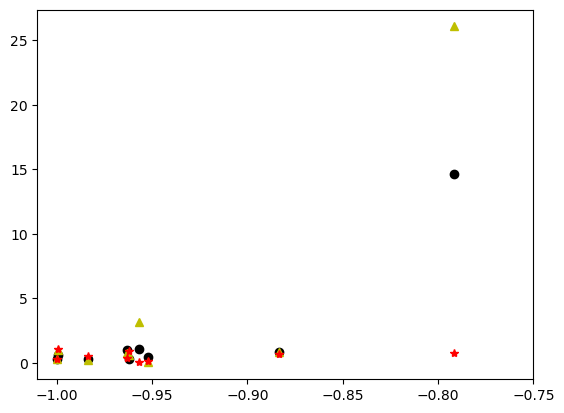

In [32]:
perc_error_A = np.abs(data_compare['A Exp.-Calc'].values/data_compare['A Exp.'])*100
print(perc_error_A)
plt.plot(k_list,perc_error_A,'ko')

perc_error_B = np.abs(data_compare['B Exp.-Calc'].values/data_compare['B Exp.'])*100
print(perc_error_B)
plt.plot(k_list,perc_error_B,'y^')

perc_error_C = np.abs(data_compare['C Exp.-Calc'].values/data_compare['C Exp.'])*100
print(perc_error_C)
plt.plot(k_list,perc_error_C,'r*')

plt.xlim(-1.01,-0.75)

0      0.555243
1      0.024674
2      0.289877
3      0.265302
4      0.634936
5      0.478968
6      0.320045
7      1.065014
8      0.677291
9      0.830565
10    14.656929
11     0.996979
Name: A Exp., dtype: float64
0      0.555243
1      0.022431
2      0.570503
3      0.181884
4      0.997269
5      0.049677
6      0.292969
7      3.150057
8      0.891632
9      0.806452
10    26.077098
11     0.720165
Name: B Exp., dtype: float64
0     1.034383
1     0.071354
2     0.915735
3     0.504032
4     1.083075
5     0.172463
6     0.292969
7     0.065876
8     0.151910
9     0.653924
10    0.788288
11    0.349243
Name: C Exp., dtype: float64


(-1.01, -0.75)

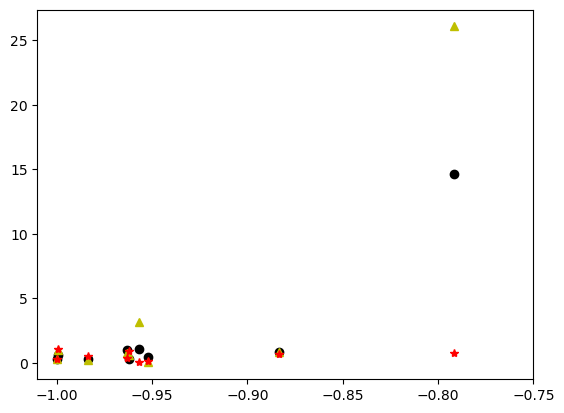

In [40]:
perc_error_A = np.abs(data_compare['A Exp.-Calc'].values/data_compare['A Exp.'])*100
print(perc_error_A)
plt.plot(k_list,perc_error_A,'ko')

perc_error_B = np.abs(data_compare['B Exp.-Calc'].values/data_compare['B Exp.'])*100
print(perc_error_B)
plt.plot(k_list,perc_error_B,'y^')

perc_error_C = np.abs(data_compare['C Exp.-Calc'].values/data_compare['C Exp.'])*100
print(perc_error_C)
plt.plot(k_list,perc_error_C,'r*')

plt.xlim(-1.01,-0.75)

In [41]:
data_compare

,IUPAC Name,SMILES,A Exp.,A Exp.-Calc,B Exp.,B Exp.-Calc,C Exp.,C Exp.-Calc,Source,rays_asymm
0,ammonia,N,9.9596,0.0553,9.9596,0.0553,6.2356,-0.0645,JPL,0.999998
1,phosphine,P,4.4582,-0.0011,4.4582,-0.0010,3.9241,-0.0028,CDMS,0.999742
2,formaldehyde,C=O,9.4178,-0.0273,1.2971,-0.0074,1.1357,-0.0104,CDMS,-0.961850
3,methanol,OC,4.2593,-0.0113,0.8247,-0.0015,0.7936,-0.0040,CDMS,-0.983503
4,hydroxylamine,NO,6.3786,-0.0405,0.8423,-0.0084,0.8402,-0.0091,CDMS,-0.999491
5,formic acid,O=CO,2.5889,-0.0124,0.4026,0.0002,0.3479,-0.0006,CDMS,-0.952128
6,acetonitrile,N#CC,5.2805,-0.0169,0.3072,-0.0009,0.3072,-0.0009,JPL,-1.000000
7,acetaldehyde,O=CC,1.8873,-0.0201,0.3492,0.0110,0.3036,0.0002,JPL,-0.956572
8,cyclopropene,C1=CC1,1.0040,-0.0068,0.7290,0.0065,0.4608,0.0007,CDMS,-0.047453
9,2-methyloxirane,CC1CO1,0.6020,-0.0050,0.2232,0.0018,0.1988,0.0013,CDMS,-0.883301


In [72]:
SMILES =list(data_compare['SMILES'].values)

A_list = []
B_list = []
C_list = []

for SMILE in SMILES:
    A = data_all[data_all['SMILES']==SMILE]['A [cm-1]'].values[0]*29979.2458
    B = data_all[data_all['SMILES']==SMILE]['B [cm-1]'].values[0]*29979.2458
    C = data_all[data_all['SMILES']==SMILE]['C [cm-1]'].values[0]*29979.2458

    A_list.append(A)
    B_list.append(B)
    C_list.append(C)
    


In [73]:
labels = list(['IUPAC Name', 'SMILES','A Exp.', 'A Calc.','PE', 'B Exp.', 'B Calc.','PE', 'C Exp.','C Calc.', 'PE', 'Source'])

# obs_A = np.array(data_compare['obs_A'].values)#*0.0000334
# obs_B = np.array(data_compare['obs_B'].values)#*0.0000334
# obs_C = np.array(data_compare['obs_C'].values)#*0.0000334

source = ['CDMS', 'CDMS', 'CDMS', 'JPL', 'CDMS', 'JPL', 'JPL', 'CDMS', 'CDMS', 'CDMS', 'CDMS', 'JPL']

rows = [labels] + list(zip(list(data_compare['IUPAC Name'].values),SMILES, list(data_compare['A Exp.'].values*29979.2458), A_list, list(perc_error_A), list(list(data_compare['B Exp.'].values*29979.2458)),  B_list,list(perc_error_B), list(list(data_compare['C Exp.'].values*29979.2458)), C_list,list(perc_error_C), source))
print(rows)


[['IUPAC Name', 'SMILES', 'A Exp.', 'A Calc.', 'PE', 'B Exp.', 'B Calc.', 'PE', 'C Exp.', 'C Calc.', 'PE', 'Source'], ('ammonia', 'N', 298581.29646968003, 296925.6278304, 0.5552431824571268, 298581.29646968003, 296925.5321441, 0.5552431824571268, 186938.58511048, 188873.9310587, 1.0343832189364295, 'CDMS'), ('phosphine', 'P', 133653.47362556, 133687.3381023, 0.02467363509936746, 133653.47362556, 133685.2788668, 0.022430577363061328, 117641.55844378001, 117727.9046472, 0.07135394103106445, 'CDMS'), ('formaldehyde', 'C=O', 282338.54109524, 283157.4150018, 0.2898766166195927, 38886.07972718, 39107.4673885, 0.5705034307300902, 34047.429455059995, 34361.7005082, 0.9157347891168442, 'CDMS'), ('methanol', 'OC', 127690.60163594, 128029.7159809, 0.26530181015659854, 24723.88401126, 24770.9745585, 0.18188432157148055, 23791.529466879998, 23912.1457917, 0.5040322580645161, 'JPL'), ('hydroxylamine', 'NO', 191225.61725988, 192438.496022, 0.6349355657981376, 25251.51873734, 25504.1414834, 0.99726938

In [75]:
print('\nTabulate Latex:')
print(tabulate(rows, headers='firstrow', tablefmt='latex',floatfmt=(None, None,'.0f','.0f','.2f','.0f','.0f','.2f','.0f','.0f','.2f',None)))


Tabulate Latex:
\begin{tabular}{llrrrrrrrrrl}
\hline
 IUPAC Name       & SMILES   &   A Exp. &   A Calc. &    PE &   B Exp. &   B Calc. &    PE &   C Exp. &   C Calc. &   PE & Source   \\
\hline
 ammonia          & N        &   298581 &    296926 &  0.56 &   298581 &    296926 &  0.56 &   186939 &    188874 & 1.03 & CDMS     \\
 phosphine        & P        &   133653 &    133687 &  0.02 &   133653 &    133685 &  0.02 &   117642 &    117728 & 0.07 & CDMS     \\
 formaldehyde     & C=O      &   282339 &    283157 &  0.29 &    38886 &     39107 &  0.57 &    34047 &     34362 & 0.92 & CDMS     \\
 methanol         & OC       &   127691 &    128030 &  0.27 &    24724 &     24771 &  0.18 &    23792 &     23912 & 0.50 & JPL      \\
 hydroxylamine    & NO       &   191226 &    192438 &  0.63 &    25252 &     25504 &  1.00 &    25189 &     25462 & 1.08 & CDMS     \\
 formic acid      & O=CO     &    77613 &     77986 &  0.48 &    12070 &     12065 &  0.05 &    10430 &     10449 & 0.17 & JPL   